In [95]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from keras.utils.np_utils import normalize
from PIL import Image
import numpy as np
from patchify import patchify, unpatchify


In [96]:
os.chdir('E:\\PlotDel_Steven\\sen_proj')
from fpackage.resnet50_unet import DataGen, build_resnet50_unet

In [97]:
data_dir= "../"
dataset_path = data_dir + "Data/dataset"

In [98]:
input_shape = (512, 512, 3)
model = build_resnet50_unet(input_shape)
model.load_weights(dataset_path + "/ResNet_UNet.h5")
#model.summary()

In [191]:
import matplotlib.pyplot as plt

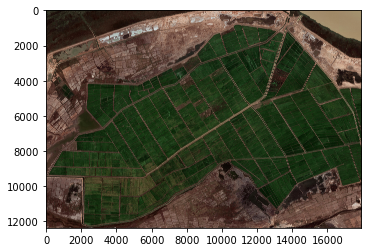

In [447]:
#Apply a trained model on large image
import matplotlib.pyplot as plt
test_image = cv2.imread(r"E:\PlotDel_Steven\Data\out.tif") #BGR
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
#test_image = cv2.resize(test_image, (12288, 12288))

#This will split the image into small images of shape [3,3]
patches = patchify(test_image, (512,512, 3), step=512)  #Step=512 for 512 patches means no overlap
plt.imshow(test_image)

In [448]:
patches.shape,single_patch.shape

((24, 35, 1, 512, 512, 3), (1, 512, 512, 3))

In [449]:
image_size = 512
i=0
j=0
single_patch = patches[i, j, 0, :, :, :]
#single_patch = cv2.resize(single_patch, (image_size, image_size))

single_patch = np.expand_dims(single_patch, axis=0) #very important
single_patch = single_patch/255.0


In [272]:
single_patch = patches[i, j, 0, :, :, :]       
single_patch = np.expand_dims(single_patch, axis=0) #very important
single_patch = single_patch/255.0
single_patch_prediction = (model.predict(single_patch))

In [302]:
single_patch_predicted_img.shape

(512, 512)

In [308]:
result.shape
#single_patch_predicted_img = np.argmax(result, axis=3)[0,:,:]


(512, 512)

In [407]:
predicted_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        #print(i,j)
        
        single_patch = patches[i, j, 0, :, :, :]       
        single_patch = np.expand_dims(single_patch, axis=0) #very important
        single_patch = single_patch/255.0
        result = (model.predict(single_patch)).astype(np.uint8)
        result = result > 0.1179123
        result = np.reshape(result*255, (512, 512))
        #single_patch_predicted_img = np.argmax(result, axis=3)[0,:,:]

        predicted_patches.append(single_patch_predicted_img)

predicted_patches = np.array(predicted_patches)


In [373]:
predicted_patches1 = np.array(predicted_patches)
predicted_patches1.shape

(840, 512, 512)

In [480]:

predicted_patches1 = np.array(predicted_patches)
predicted_patches_reshaped = np.reshape(predicted_patches1, (patches.shape[0], 
                                                            patches.shape[1],
                                                            patches.shape[2], 
                                                            512,512
                                                            ))
#predicted_patches_reshaped = np.expand_dims(predicted_patches_reshaped, axis=5) #introduce channel

predicted_patches_reshaped = np.stack((predicted_patches_reshaped,)*3, axis=-1).astype(np.uint8)

#reconstructed_image = unpatchify(predicted_patches_reshaped, test_image.shape)
#lt.imshow(reconstructed_image, cmap='gray')
#plt.imsave('data/results/segm.jpg', reconstructed_image, cmap='gray')
(predicted_patches_reshaped.shape),cv2.resize(test_image, (17920,12288)).shape


((24, 35, 1, 512, 512, 3), (12288, 17920, 3))

In [485]:
12288/512,17920/512

(24.0, 35.0)

In [483]:
p = predicted_patches_reshaped.shape[0]*512,predicted_patches_reshaped.shape[1]*512
p,cv2.resize(test_image, (int(p[1]),int(p[0]))).shape

((12288, 17920), (12288, 17920, 3))

In [479]:
#predicted_patches_reshaped = unpatchify(predicted_patches_reshaped, test_image.shape)
reconstructed_image = unpatchify(predicted_patches_reshaped, cv2.resize(test_image, (17920,12288)).shape)


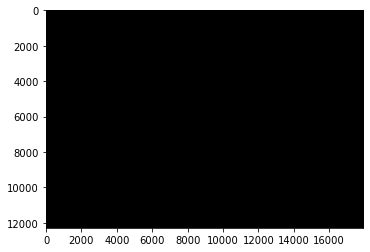

In [444]:
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

In [475]:
p = np.round(test_image.shape[1]/512)*512,np.round(test_image.shape[0]/512)*512
p

(17920.0, 12288.0)

In [478]:
print(cv2.resize(test_image, (int(p[0]),int(p[1]))).shape)
print(cv2.resize(test_image, (17920,12288)).shape)

(12288, 17920, 3)
(12288, 17920, 3)


In [406]:
(patches.shape[0], patches.shape[1],patches.shape[2], 512,512),patches.shape

((24, 35, 1, 512, 512), (24, 35, 1, 512, 512, 3))

In [324]:
test_image.shape

(12365, 17920, 3)

In [411]:
512*24

12288

In [413]:
17920/512

35.0

In [ ]:
plt.hist(reconstructed_image.flatten())  #Threshold everything above 0

# final_prediction = (reconstructed_image > 0.01).astype(np.uint8)
# plt.imshow(final_prediction)

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Large Image')
plt.imshow(large_image, cmap='gray')
plt.subplot(222)
plt.title('Prediction of large Image')
plt.imshow(reconstructed_image, cmap='jet')
plt.show()

In [ ]:
predicted_patches.shape


In [ ]:
image = cv2.resize(image, (image_size, image_size))
    image = np.expand_dims(image, axis=0) #very important
    image = image/255.0
    image = np.array(image)
    #print(image.shape)
    result = model.predict(image)
    #print(result)
    result = result > 0.1899999123
    #print(result)
    result = np.reshape(result*255, (image_size, image_size))
    #save a image using the iteration index
    cv2.imwrite(str(save_path)+"/tile_{}.png".format(idx),result)

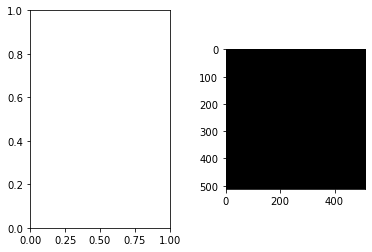

In [279]:
result = model.predict(single_patch)
result = result > 0.1179123
result = np.reshape(result*255, (512, 512))

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
#ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result*255, (image_size, image_size)), cmap="gray")

In [149]:
single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)

single_patch_input.shape

(1, 512, 512, 1)

In [63]:
#single_patch

In [28]:
i=0
j=0
single_patch = patches[i,j,:,:]
#single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)
#single_patch_input=np.expand_dims(single_patch_norm, 0)
#(model.predict(single_patch)[0,:,:,0] > 0.5)

#image = np.expand_dims(single_patch, axis=0) #very important
single_patch = single_patch/255.0
#image = np.array(image)
#print(image.shape)
result = model.predict(single_patch)
#print(result)
result = result > 0.078123
#print(result)
result = np.reshape(result*255, (image_size, image_size))

ValueError: in user code:

    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\functional.py:421 call
        inputs, training=training, mask=mask)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer conv1_pad is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (32, 512)


In [15]:
patch_size=512

predicted_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        print(i,j)
        
        single_patch = patches[i,j,:,:]
        single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)
        single_patch_input=np.expand_dims(single_patch_norm, 0)

#Predict and threshold for values above 0.5 probability
        single_patch_prediction = (model.predict(single_patch_input)[0,:,:,0] > 0.5).astype(np.uint8)
        predicted_patches.append(single_patch_prediction)

predicted_patches = np.array(predicted_patches)




0 0


ValueError: in user code:

    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\functional.py:421 call
        inputs, training=training, mask=mask)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer conv1_conv is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (None, 518, 518, 1)
